Master 2 Chemistry PSL
Philippe Nghe

Practical 'Simulate a gene network', Pulse from a feed-forward loop (1.5 hours)


We consider a gene network consisting of an incoherent feed-forward loop as described in the following article:
Mangan, S., & Alon, U. (2003). Structure and function of the feed-forward loop network motif. Proceedings of the National Academy of Sciences, 100(21), 11980-11985. 
The aim of the practical is to design a circuit that generates a pulse, assuming that X is OFF at t0, then suddently ON after some time. For this, we will consider that X represses Y, Y activates Z, and X activates Z. For the simulation of the time courses of X, Y and Z, we will use the Euler method, which is the simplest method to numerically solve differential equation. It is not particularly stable but sufficient for our purpose.



In [1]:
###############################################################################
#                          Libraries to use  
###############################################################################
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from scipy.integrate import odeint 

First, program an activator function with parameters dissociation constant k, Hill coefficient h, and maximum activation M. For simplicity we assume the leakage (minimum) to be zero. 

Plot it in linear scale and log scale for axis x.

Play with the parameter to test their influence on the curves.

In [67]:
def Activator(M,h,k,x):
##

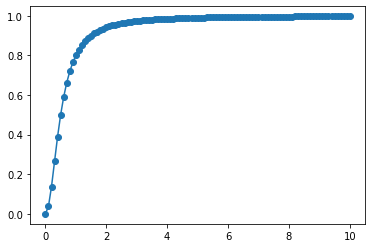

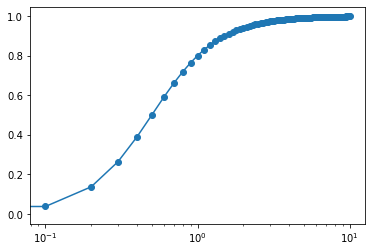

In [68]:
##test activator function


Similarly, program a repressor function with parameters dissociation constant k, Hill coefficient h, and maximum M. 

In [69]:
def Repressor(M,h,k,x):
##

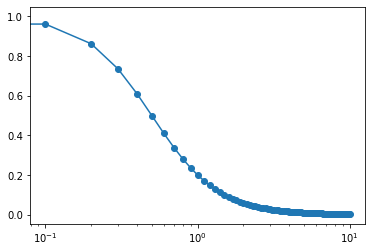

In [70]:
## test repressor function


We will now start to simulate timecourses. For the stability of the Euler method, we must choose a time step small compared to the characteristic time. All relaxation rates (=dilution rate + degration rate) will be taken so that the characteristic time is 1 (in arbitrary unit, we interpret 1 to be one hour). We take a timestep of 0.1. If characteristic times were chosen of order 0.1, the simulation would diverge.
- Set maximum time 'Tmax' to 15 hours.
- Create a time vector 'T' with a total number of steps 'Ntot' so that the timestep 'dt' is 0.1 hour

In [74]:
##

We suppose there is a process such that X is OFF (X=0 during 5 hours) and suddenly ON (X=1 from 5 to 15 hours). 
- Create the vector X with appropriate values.
- Display a figure of X as a function of time T.

Text(0, 0.5, 'X')

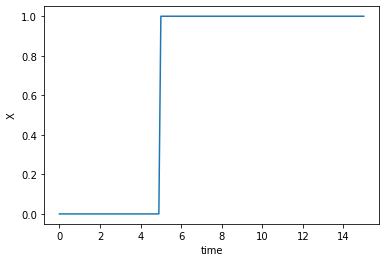

In [75]:
##

We now implement the response of Y due to the direct repression of X. 

Create all parameters of the simulation by setting them to 1: 
- relaxation time 'ty',  
- Hill coefficient 'HY', 
- maximum repression 'MY', 
- dissociation constant 'KY'. 

Create a vector of zeros to record Y values and set the initial value of Y to 1. 

Create a 'for' loop starting at time index 1 so that Y is updated as a function of X, using the Euler algorithm.

You should observe that Y increase from 1 to 10 during the OFF phase, then decreases from 10 to 5 during the ON phase. Instead, we want a simulation where Y is constant equal to 1 during the OFF phase, then decreases down to 0.1 during the ON phase, when X starts to represses Y.

If necessary, adjust the maximum MY so that Y remains constant equal to 1 during the OFF phase.

Adjust parameter KY so that Y reaches 0.1 at the end of the ON phase.

Text(0, 0.5, 'Y')

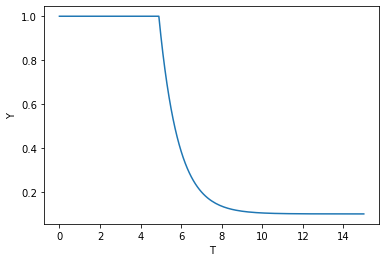

In [76]:
##

We build a cascade, using the response of Y to X that we just programmed, and add a layer where Z is activated by Y. 
As above, fix the response time 'tz' to 1, as well as the new parameters for the activator: 'M1', 'H1', 'K1'.

Create a 'for' loop to update Z as a function of Y. 

You should observe that Z decreases during the OFF phase. Instead, we want to set the initial value of Z so that it remains steady during the OFF phase. Compute this value using the same method as above, by computing the steady-state value of Z when X is kept constant equal to zero.

Text(0, 0.5, 'Z due to Y')

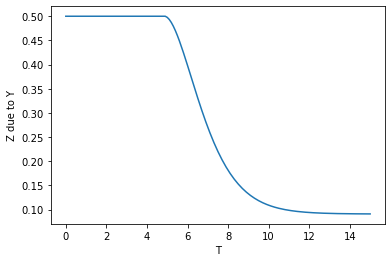

In [77]:
##

Finally, we will create a pulse by integrating a direct activating signal from X to Z, using 'AND' (multiplicative) integration. 

Initialize parameters M2, H2, and K2 for the direct activation of Z by X.

Compute Z as a function of X and Y using the Euler method.

Tune the parameters M2, H2, K2 to obtain a pulse.

You should observe that Z=0 during the OFF phase, then increases and decreases. However, tuning the parameters M2, H2, K2 does not allow to modify the ratio between the maximum of the pulse and the minimum after the pulse. 

How could you change this?

Text(0, 0.5, 'Z after AND integration')

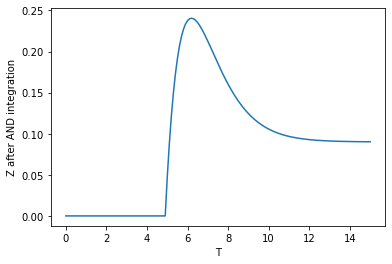

In [78]:
##


Answer to the last question: to increase the amplitude of the decrease after the pulse, tune KY at the beginning of the code.